In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from src.data.loading import loading, sample
from src.data.cleaning import cleaning

filepath = "/Users/thananpornsethjinda/Desktop/credit-risk-modeling/data/accepted_2007_to_2018Q4.csv"

raw_data = loading(file_path=filepath)

sampled_raw_data = sample(raw_data)

/Users/thananpornsethjinda/Desktop/credit-risk-modeling/src/data/loading.py:10: DtypeWarning: Columns (0: id, 1: desc, 2: next_pymnt_d, 3: verification_status_joint, 4: sec_app_earliest_cr_line, 5: hardship_type, 6: hardship_reason, 7: hardship_status, 8: hardship_start_date, 9: hardship_end_date, 10: payment_plan_start_date, 11: hardship_loan_status, 12: debt_settlement_flag_date, 13: settlement_status, 14: settlement_date) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(file_path)


Data successfully read in 28.473739624023438 seconds!


## Univariate Statistics 

In [ ]:
# basic univariate statistics 

sampled_raw_data.select_dtypes(include=['float64']).describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,226068.000000,226068.000000,226068.000000,226068.000000,226068.000000,2.260680e+05,225888.000000,226067.000000,226068.000000,...,1075.0,1075.000000,1075.0,1075.000000,848.000000,1075.000000,1075.000000,3403.000000,3403.000000,3403.000000
mean,NaN,15070.351952,15065.487265,15047.377266,13.092572,446.549619,7.796242e+04,18.844939,0.308457,698.579764,...,3.0,152.322912,3.0,13.784186,453.185024,11566.801656,197.197516,4950.117423,47.886679,13.084631
std,NaN,9216.504854,9215.124862,9219.239420,4.829767,268.001252,7.251607e+04,15.012518,0.876815,33.045563,...,0.0,123.937801,0.0,9.808783,366.525008,7512.847066,197.829502,3654.728888,7.319480,8.123018
min,NaN,500.000000,500.000000,0.000000,5.310000,14.770000,0.000000e+00,0.000000,0.000000,615.000000,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,161.000000,18.920000,0.000000
25%,NaN,8000.000000,8000.000000,8000.000000,9.490000,252.140000,4.600000e+04,11.900000,0.000000,675.000000,...,3.0,58.750000,3.0,5.000000,174.022500,5625.005000,48.230000,2205.230000,45.000000,6.000000
50%,NaN,13000.000000,12975.000000,12875.000000,12.620000,378.200000,6.500000e+04,17.830000,0.000000,690.000000,...,3.0,118.130000,3.0,15.000000,358.365000,10184.380000,136.380000,4078.000000,45.010000,14.000000
75%,NaN,20000.000000,20000.000000,20000.000000,15.990000,593.830000,9.329475e+04,24.490000,0.000000,715.000000,...,3.0,213.940000,3.0,23.000000,640.462500,16193.290000,292.815000,6750.940000,50.000000,18.000000
max,NaN,40000.000000,40000.000000,40000.000000,30.990000,1714.540000,1.099920e+07,999.000000,25.000000,845.000000,...,3.0,765.830000,3.0,32.000000,2297.490000,37280.390000,1161.510000,23774.000000,184.360000,65.000000


In [ ]:
# count of number of nulls in each column

pd.set_option("display.max_rows", 151)
sampled_raw_data.isnull().sum()

id                                                 0
member_id                                     226068
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      16807
emp_length                                     14789
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [ ]:
# columns with high proportion of null-values 

columns_to_drop = []
total_length = len(sampled_raw_data)
for column in sampled_raw_data.columns: 
    if sampled_raw_data[column].isnull().sum()/total_length >= 0.60: 
        columns_to_drop.append(column)
print(columns_to_drop)

['member_id', 'desc', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 

## Data Distribution and Test of Normality

In [12]:
sampled_data = sampled_raw_data.drop(columns_to_drop, axis=1)

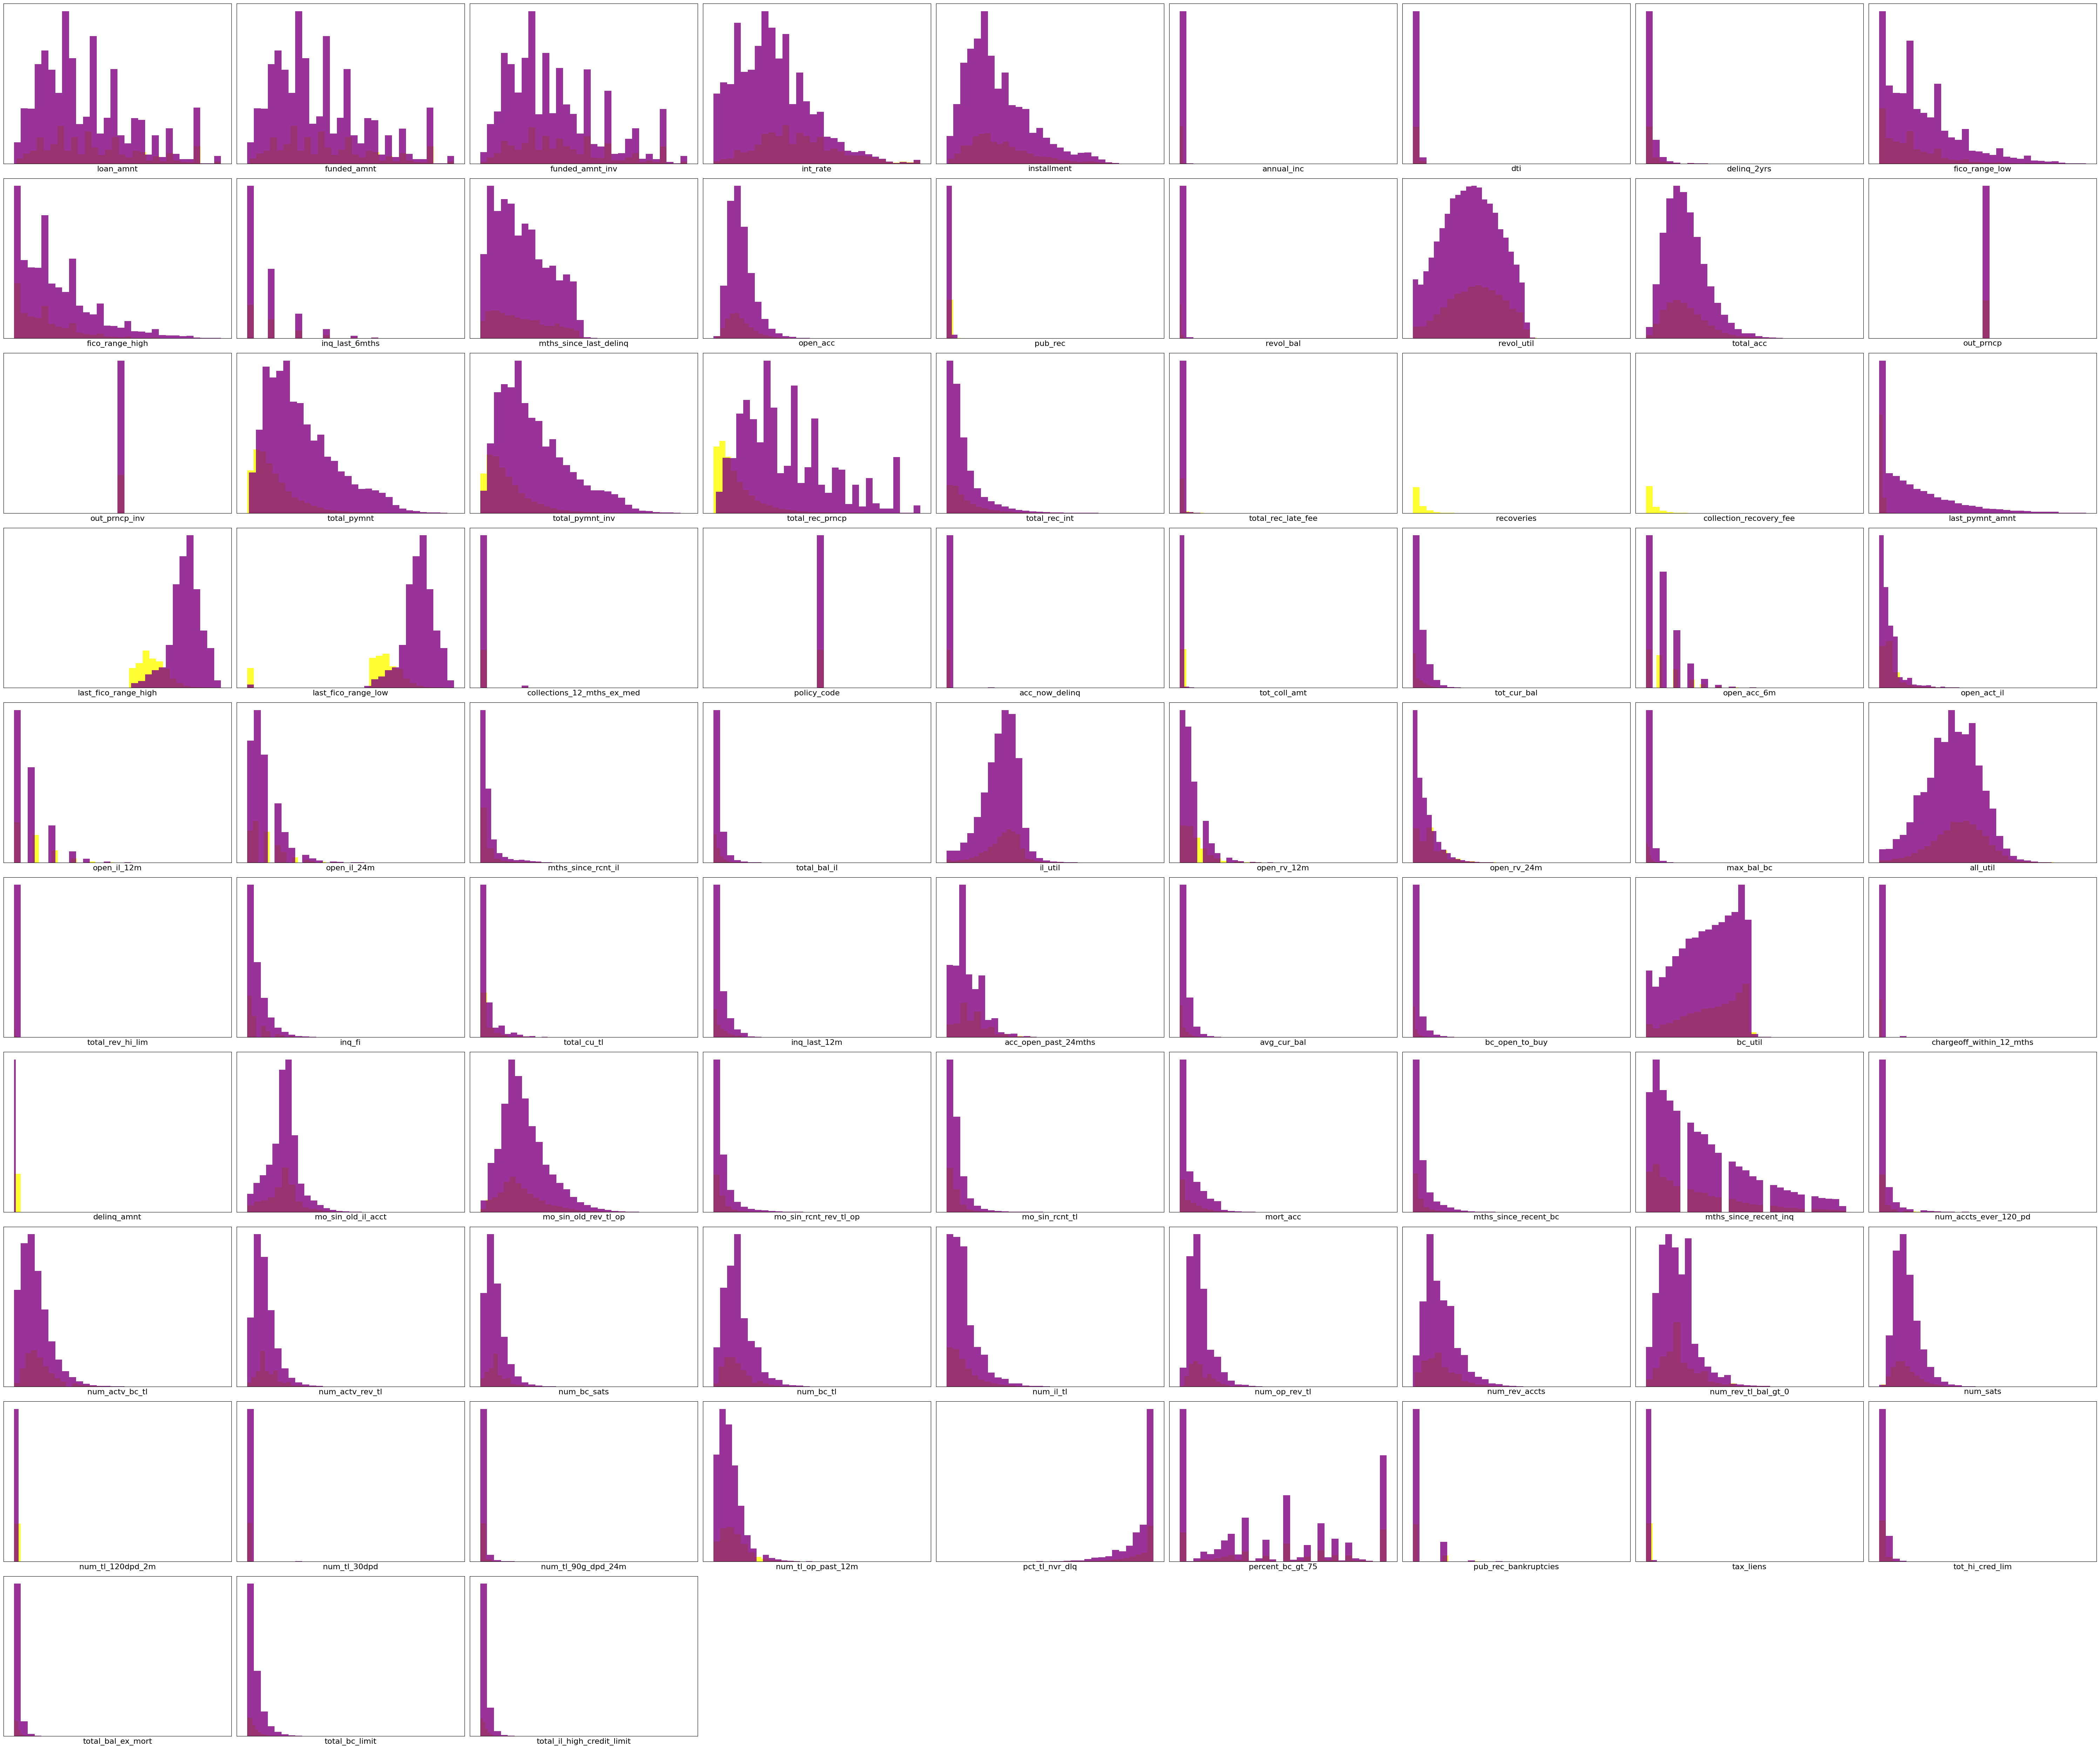

In [ ]:
charged_off = sampled_data.loc[sampled_data['loan_status'] == 'Charged Off']
fully_paid = sampled_data.loc[sampled_data['loan_status'] == 'Fully Paid']

columns = list(charged_off.select_dtypes(include=('float64')).columns)

num_plots = len(columns)
num_rows = (num_plots + 8) // 9  # Calculate required rows
num_cols = min(9, num_plots)  # Max 9 columns

# Close the initial figure that was created
plt.close()

# Create new figure with correct dimensions
fig, axs = plt.subplots(nrows=num_rows, ncols=9, figsize=(60, num_rows * 5))

# Flatten axs if it's a 2D array, handle case where it might be 1D
if num_rows == 1:
    axs = axs.reshape(1, -1)

index = 0 
for i in range(num_rows): 
    for j in range(9): 
        if index < len(columns):
            axs[i, j].hist(charged_off[columns[index]], alpha=0.8, color='yellow', bins=30)
            axs[i, j].hist(fully_paid[columns[index]], alpha=0.8, color='purple', bins=30)
            axs[i, j].set_xlabel(columns[index], fontsize=16)
            axs[i, j].tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, top=False, right=False)
            index += 1
        else:
            # Hide unused subplots
            axs[i, j].axis('off')

plt.tight_layout()

# observation: 
# data most features are very skewed and an indication of a presence of outliers. Some features are just constant or mostly constant (quasi constant)
# which is a possible factor for consideration during feature selection. The data is also not normally distributed. 

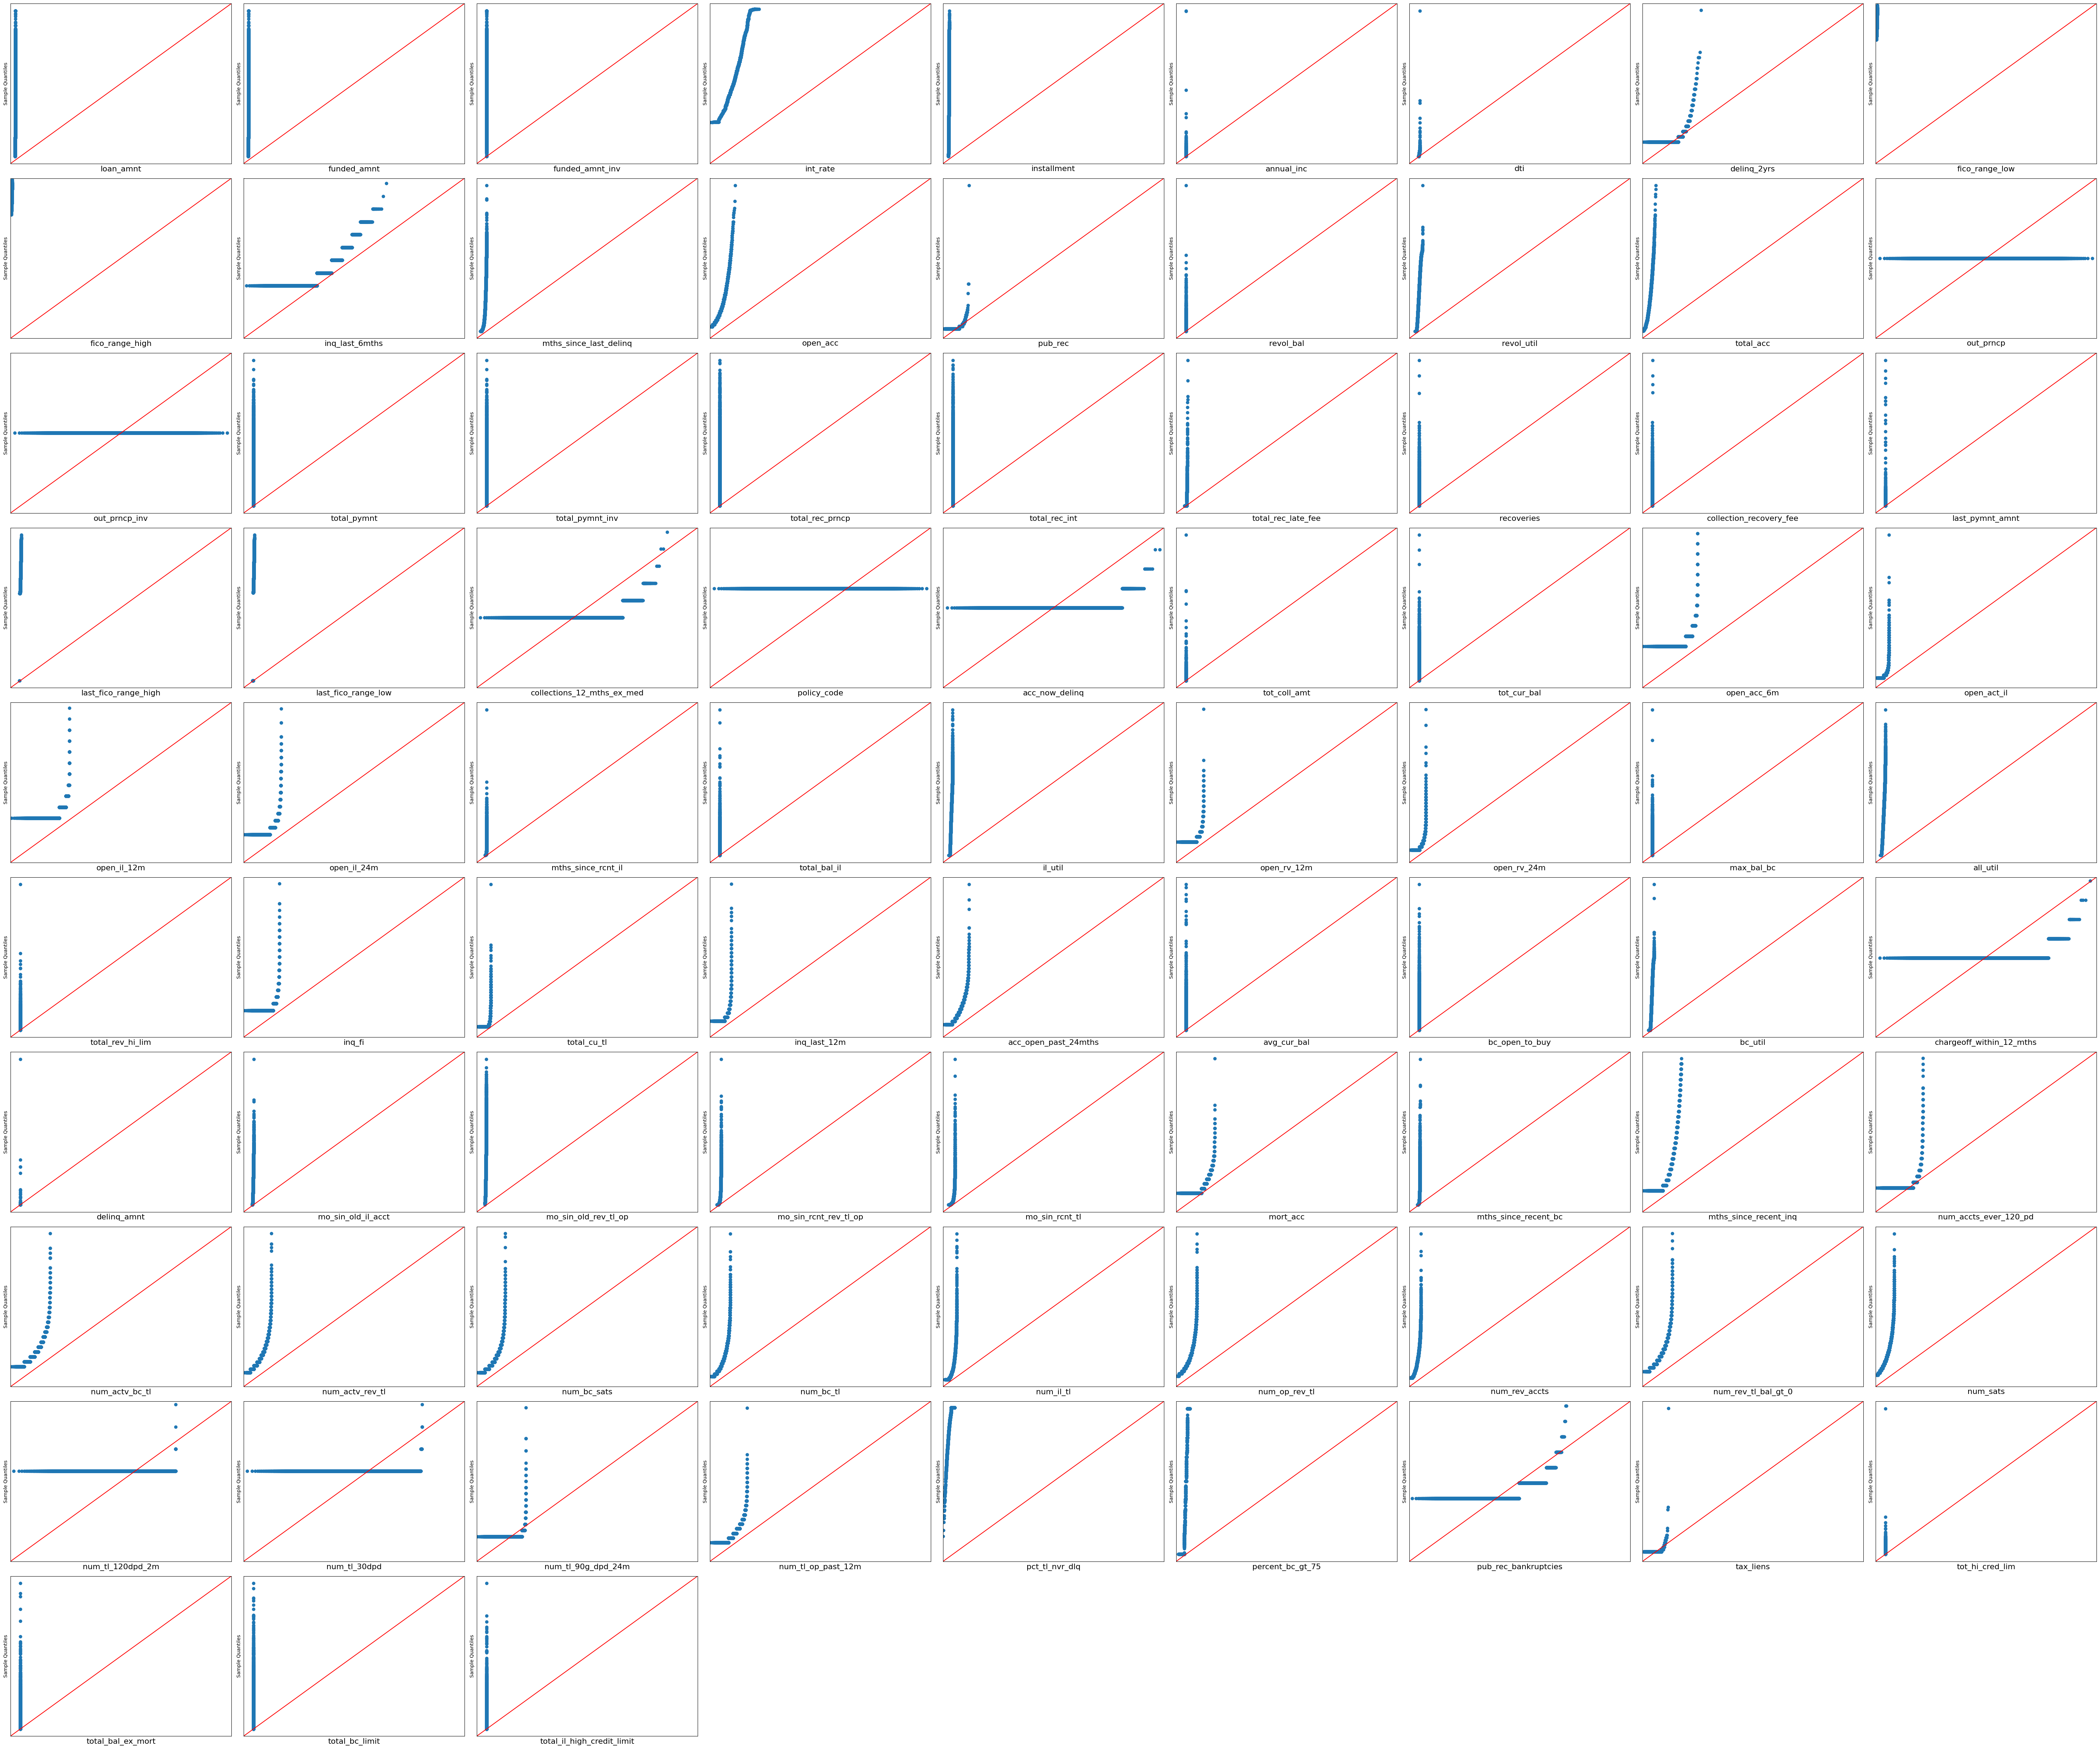

In [15]:
import scipy.stats as stats 
import statsmodels.api as sm 

charged_off = sampled_data.loc[sampled_data['loan_status'] == 'Charged Off']

columns = list(charged_off.select_dtypes(include=('float64')).columns)

num_plots = len(columns)
num_rows = (num_plots + 8) // 9  # Calculate required rows
num_cols = min(9, num_plots)  # Max 9 columns

# Close the initial figure that was created
plt.close()

# Create new figure with correct dimensions
fig, axs = plt.subplots(nrows=num_rows, ncols=9, figsize=(60, num_rows * 5))

# Flatten axs if it's a 2D array, handle case where it might be 1D
if num_rows == 1:
    axs = axs.reshape(1, -1)

index = 0 
for i in range(num_rows): 
    for j in range(9): 
        if index < len(columns):
            sm.qqplot(charged_off[columns[index]], line='45', ax=axs[i,j])
            axs[i, j].set_xlabel(columns[index], fontsize=16)
            axs[i, j].tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, top=False, right=False)
            index += 1 
        else:
            # Hide unused subplots
            axs[i, j].axis('off')

plt.tight_layout()

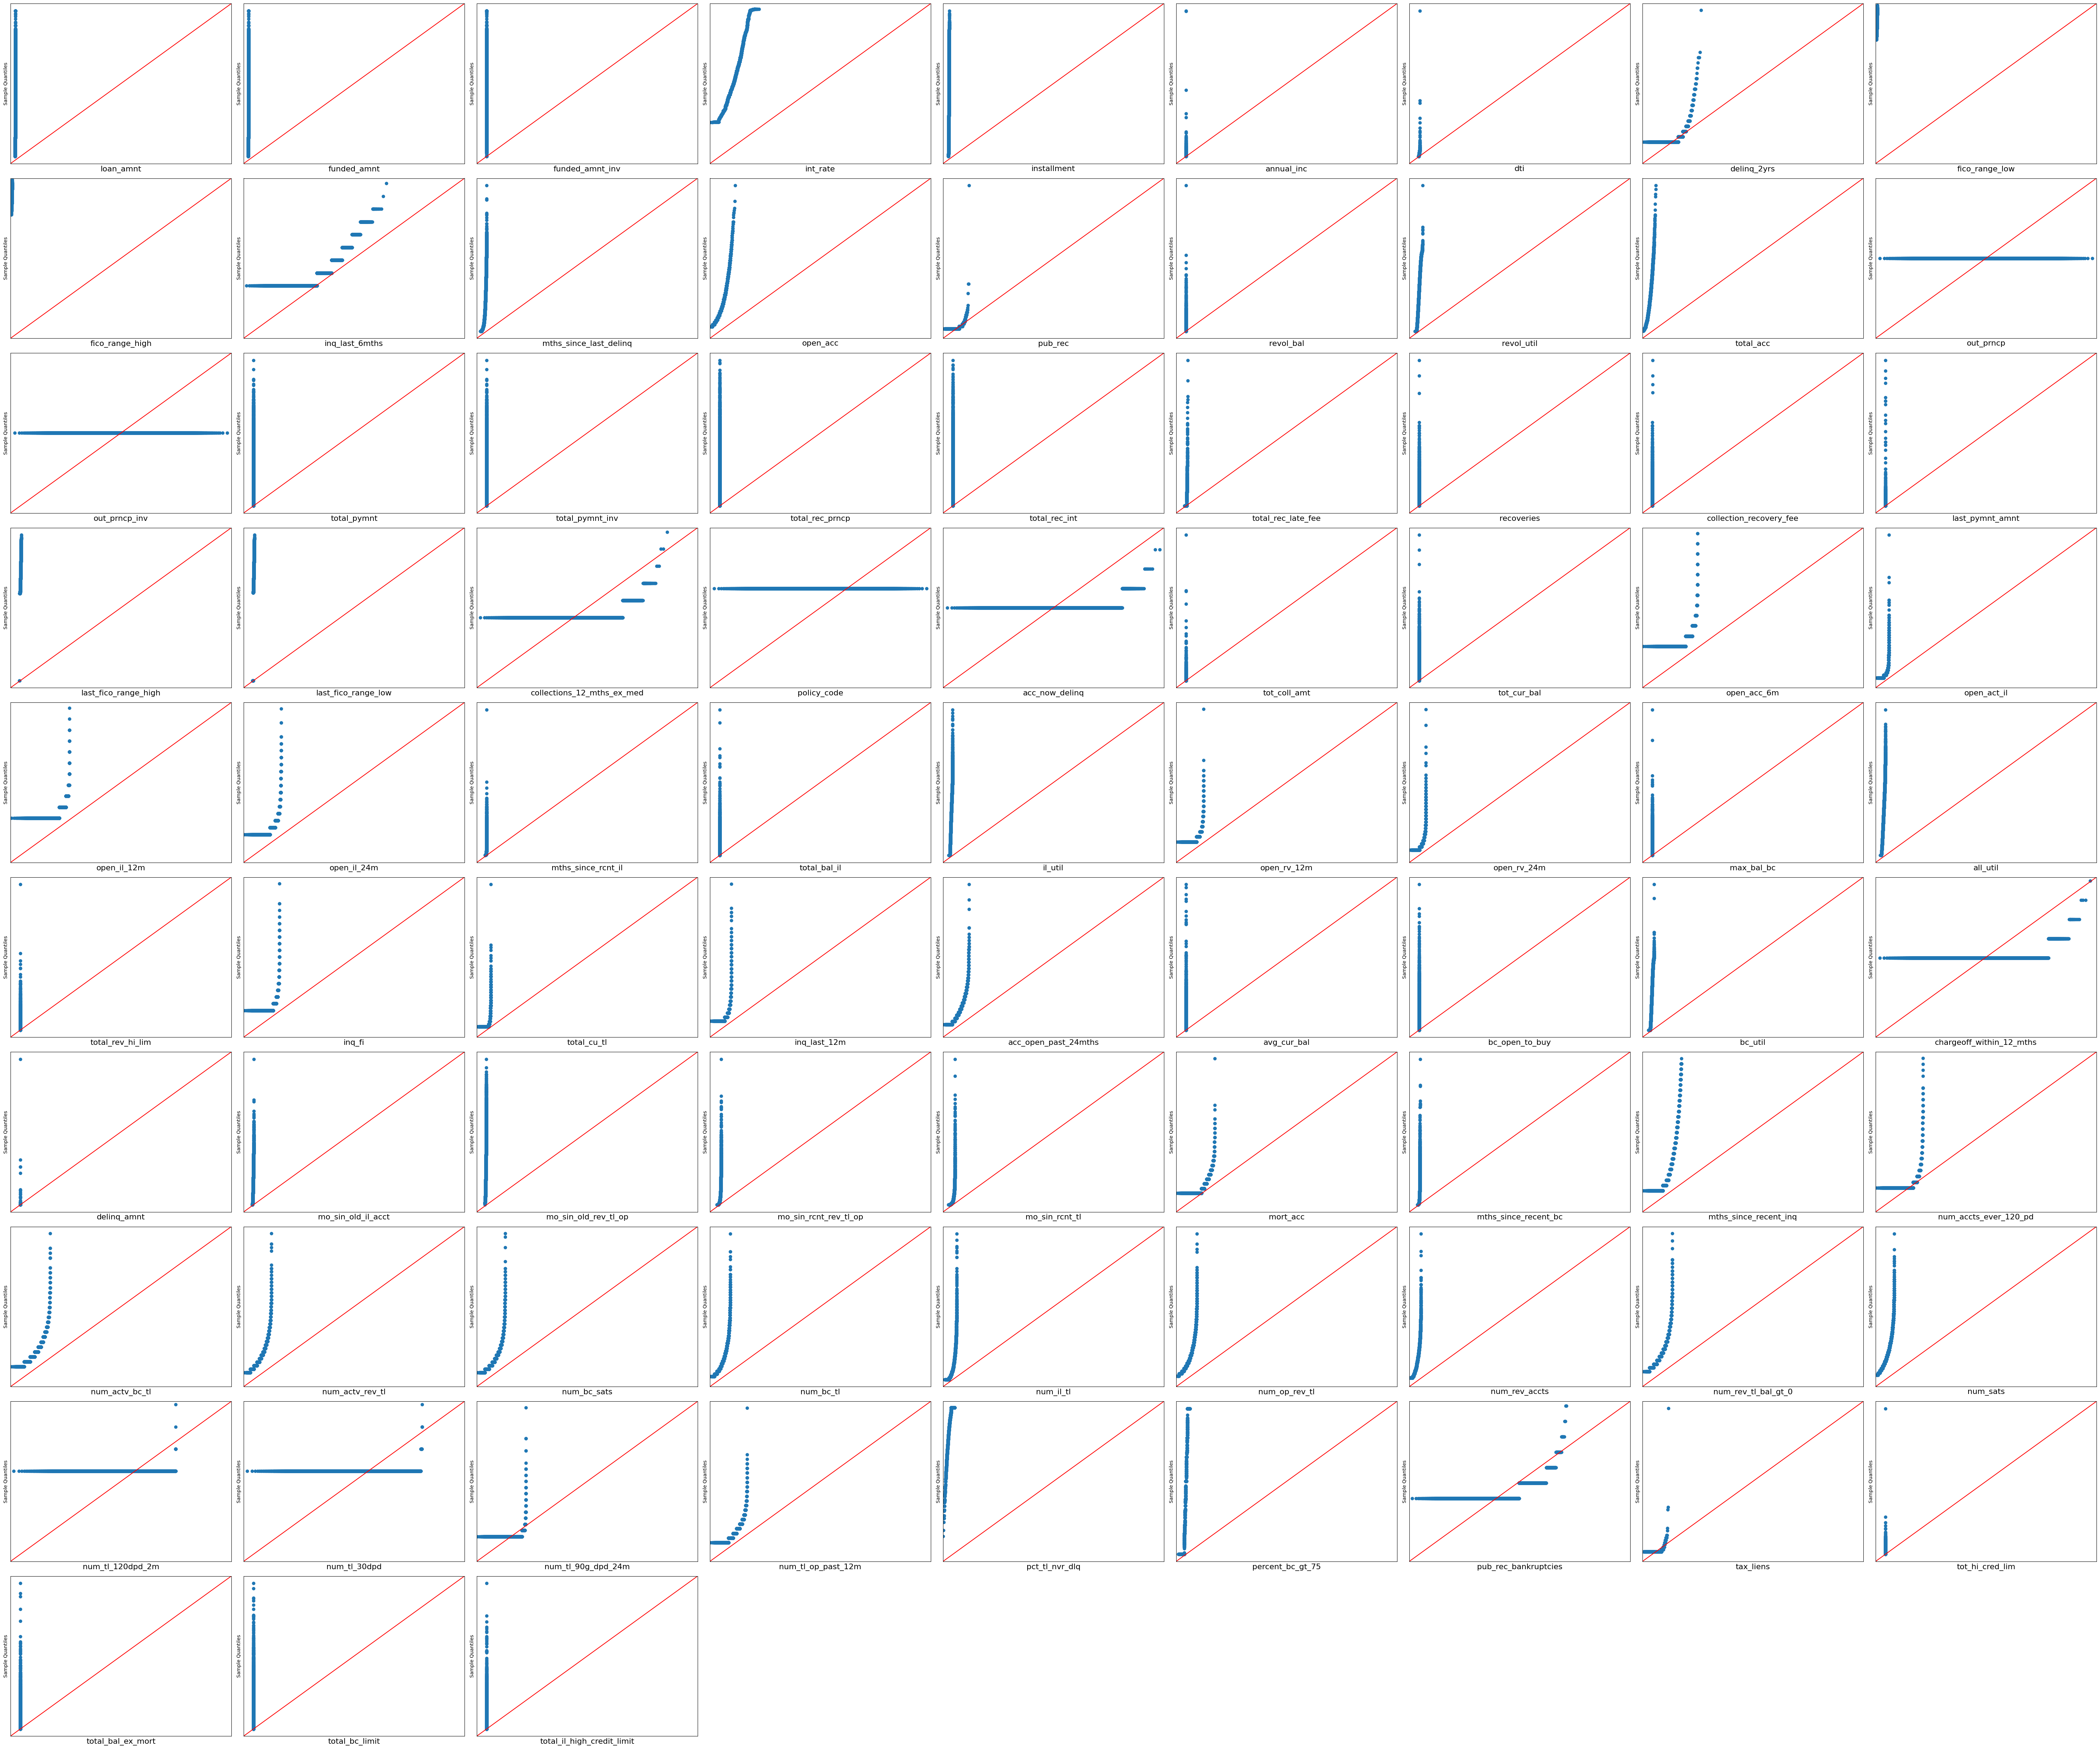

In [16]:
fully_paid = sampled_data.loc[sampled_data['loan_status'] == 'Fully Paid']

columns = list(fully_paid.select_dtypes(include=('float64')).columns)

num_plots = len(columns)
num_rows = (num_plots + 8) // 9  # Calculate required rows
num_cols = min(9, num_plots)  # Max 9 columns

# Close the initial figure that was created
plt.close()

# Create new figure with correct dimensions
fig, axs = plt.subplots(nrows=num_rows, ncols=9, figsize=(60, num_rows * 5))

# Flatten axs if it's a 2D array, handle case where it might be 1D
if num_rows == 1:
    axs = axs.reshape(1, -1)

index = 0 
for i in range(num_rows): 
    for j in range(9): 
        if index < len(columns):
            sm.qqplot(charged_off[columns[index]], line='45', ax=axs[i,j])
            axs[i, j].set_xlabel(columns[index], fontsize=16)
            axs[i, j].tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False, top=False, right=False)
            index += 1 
        else:
            # Hide unused subplots
            axs[i, j].axis('off')

plt.tight_layout()